# Speed Bumps by Neighborhood
#### By: Jake Kressley
Source: [City of Pittsburgh Speed Humps](https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps/resource/37b2ac41-ae8e-4de1-8405-157e05dc3640)

## Setting Up the Notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To start let's load in the speed bumps data.

In [6]:
speed_humps_df = pd.read_csv("data/speed-humps.csv")
speed_humps_df.head(5)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


Next let's filter out the unnessessary columns to make the data look a little more readable. 

In [8]:
# Create a new dataframe
speedhumps = pd.DataFrame(columns = ["Neighborhood", "Hump_ID"])

# Add the desired data to the dataframe
speedhumps["Neighborhood"] = speed_humps_df["neighborhood"]
speedhumps["Hump_ID"] = speed_humps_df["hump_id"]

speedhumps.head(5)

,Neighborhood,Hump_ID
0,Squirrel Hill South,1
1,Squirrel Hill South,2
2,North Oakland,3
3,North Oakland,4
4,North Oakland,5


Since this csv tracks by individual speed hump and not how many there are in a neighborhood, we will have to create a hash map to track how many speed bumps are in each neighborhood.

In [30]:
# define the dictionary that will store the data
speedhump_dict = {}

for i, row in speedhumps.iterrows():
    neighborhood = row["Neighborhood"]
    
    if neighborhood not in speedhump_dict.keys():
        speedhump_dict.update({neighborhood: [neighborhood, 1]})
    else:
        current_count = speedhump_dict[neighborhood]
        current_count[1] += 1
        speedhump_dict.update({neighborhood: current_count})

speedhumps_df = pd.DataFrame.from_dict(speedhump_dict, orient = "index")
speedhumps_df.columns = ["Neighborhood", "Speed Humps"]
speedhumps_df

,Neighborhood,Speed Humps
Squirrel Hill South,Squirrel Hill South,18
North Oakland,North Oakland,6
Brookline,Brookline,4
Bloomfield,Bloomfield,3
Polish Hill,Polish Hill,6
Homewood South,Homewood South,4
Mount Washington,Mount Washington,3
South Side Flats,South Side Flats,3
Central Oakland,Central Oakland,1
Squirrel Hill North,Squirrel Hill North,3


(If a neighborhood does not have any values it is safe to assume that there are no speedbumps in that neighborhood.)

Now we can sort the data in descending order to find which neighborhoods have the highest amount of speed humps.

In [33]:
speedhumps_df = speedhumps_df.sort_values("Speed Humps", ascending=False)
speedhumps_df

,Neighborhood,Speed Humps
Squirrel Hill South,Squirrel Hill South,18
Carrick,Carrick,9
Polish Hill,Polish Hill,6
North Oakland,North Oakland,6
Upper Hill,Upper Hill,4
Brookline,Brookline,4
Homewood South,Homewood South,4
South Side Slopes,South Side Slopes,4
Perry North,Perry North,4
Garfield,Garfield,3


We can now create a graph that represents how many speed humps are in each neighborhood

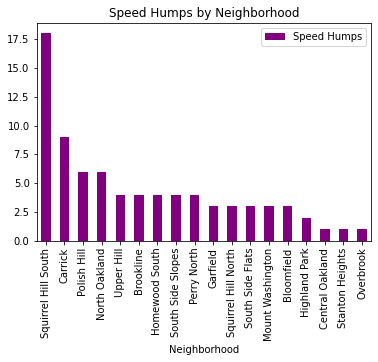

In [38]:
speedhumps_plt = speedhumps_df.plot(kind='bar', x='Neighborhood', y="Speed Humps", title="Speed Humps by Neighborhood", color='purple')

From this data you can see that Squirrel Hill South has the most speed bumps

# Number of Crashes by Neighborhood
### By: Jake Kressley

Source: [Allegheny County Crash Data](https://data.wprdc.org/dataset/allegheny-county-crash-data)

(load in the data and then say as you can see there is no neighborhood column)